# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [70]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [71]:
# Read the Mapbox API key
load_dotenv()
MAPBOX_API_KEY = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(MAPBOX_API_KEY)

## Load Data

In [72]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [73]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_group = sfo_data.groupby('year')['housing_units'].mean()
sfo_data_group

year
2010    372560.0
2011    374507.0
2012    376454.0
2013    378401.0
2014    380348.0
2015    382295.0
2016    384242.0
Name: housing_units, dtype: float64

In [74]:
# Save the dataframe as a csv file
sfo_data_group.to_csv('sfo_data_group.csv')

(370000, 385000)

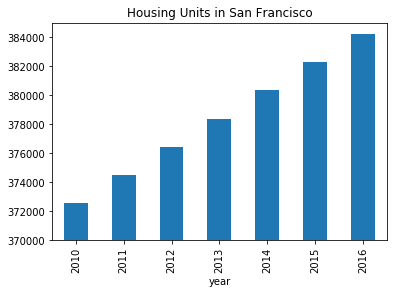

In [75]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# sfo_data_plot = sfo_data_group.plot(kind='bar', title= "Housing Unit in San Franciso")
sfo_data_plot = sfo_data_group.plot(kind='bar', title='Housing Units in San Francisco')


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
sfo_data_plot.set_ylim(370000, 385000)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [76]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!

In [77]:
sfo_data_price = sfo_data.groupby('year')['sale_price_sqr_foot', 'gross_rent'].mean()
sfo_data_price

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239.0
2011,341.903429,1530.0
2012,399.389968,2324.0
2013,483.600304,2971.0
2014,556.277273,3528.0
2015,632.540352,3739.0
2016,697.643709,4390.0


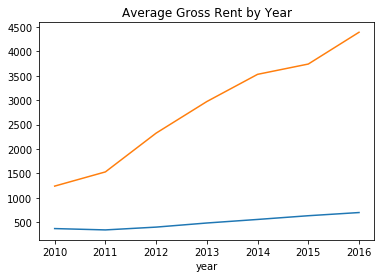

In [78]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sfo_data_plot_price = sfo_data_price['sale_price_sqr_foot'].plot(title='Average Price per SqFt')


# Line chart for average montly rent
sfo_data_plot_rent = sfo_data_price['gross_rent'].plot(title='Average Gross Rent by Year')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [79]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_neighborhood = sfo_data

In [80]:

#sfo_data_neighborhood = sfo_data_neighborhood.groupby('year', 'neighborhood')
sfo_data_neighborhood = sfo_data_neighborhood.groupby(['year', 'neighborhood']).mean()
sfo_data_neighborhood.head(20)


sale_price_sqr_foot  housing_units  \
year neighborhood                                                        
2010 Alamo Square                            291.182945       372560.0   
     Anza Vista                              267.932583       372560.0   
     Bayview                                 170.098665       372560.0   
     Buena Vista Park                        347.394919       372560.0   
     Central Richmond                        319.027623       372560.0   
     Central Sunset                          418.172493       372560.0   
     Corona Heights                          369.359338       372560.0   
     Cow Hollow                              569.379968       372560.0   
     Croker Amazon                           165.645730       372560.0   
     Diamond Heights                         456.930822       372560.0   
     Downtown                                241.804552       372560.0   
     Eureka Valley/Dolores Heights           403.118313       372560.0   
     Excelsior                               364.928336       372560.0   
     Financial District North                401.749967       372560.0   
     Financial District South                162.821210       372560.0   
     Forest Knolls                           209.049327       372560.0   
     Glen Park                               715.586438       372560.0   
     Golden Gate Heights                     551.801119       372560.0   
     Haight Ashbury                          254.473779       372560.0   
     Hayes Valley                            272.284980       372560.0   

                                    gross_rent  
year neighborhood                               
2010 Alamo Square                       1239.0  
     Anza Vista                         1239.0  
     Bayview                            1239.0  
     Buena Vista Park                   1239.0  
     Central Richmond                   1239.0  
     Central Sunset                     1239.0  
     Corona Heights                     1239.0  
     Cow Hollow                         1239.0  
     Croker Amazon                      1239.0  
     Diamond Heights                    1239.0  
     Downtown                           1239.0  
     Eureka Valley/Dolores Heights      1239.0  
     Excelsior                          1239.0  
     Financial District North           1239.0  
     Financial District South           1239.0  
     Forest Knolls                      1239.0  
     Glen Park                          1239.0  
     Golden Gate Heights                1239.0  
     Haight Ashbury                     1239.0  
     Hayes Valley                       1239.0

In [81]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_data_neighborhood.hvplot(x='year', y='sale_price_sqr_foot', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [82]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
sfo_data_neighborhood.hvplot(x='year', y='gross_rent', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [83]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_data_neighborhood = sfo_data.groupby(['neighborhood']).mean()
sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=True).nlargest(10, columns='sale_price_sqr_foot')
sfo_data_neighborhood

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [84]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_data_neighborhood_plot = sfo_data_neighborhood
sfo_data_neighborhood_plot.hvplot(y='sale_price_sqr_foot', kind='bar', width=1000)



:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [85]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood

sfo_data_neighborhood = sfo_data
sfo_data_neighborhood = sfo_data_neighborhood.groupby(['year', 'neighborhood']).mean()
sfo_data_neighborhood


sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[397 rows x 3 columns]

In [86]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_data_neighborhood = sfo_data
sfo_data_neighborhood = sfo_data_neighborhood.groupby(['year', 'neighborhood']).mean().hvplot( y='housing_units', groupby='neighborhood')
sfo_data_neighborhood



:DynamicMap   [neighborhood]
   :Curve   [year]   (housing_units)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [87]:
# Load neighborhoods coordinates data
coord = pd.read_csv('neighborhoods_coordinates.csv')
coord.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [88]:
neighborhood = sfo_data.groupby(['neighborhood']).mean()
neighborhood.head(10)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333
Buena Vista Park,452.680591,378076.5,2698.833333
Central Richmond,394.422399,378401.0,2817.285714
Central Sunset,423.687928,378401.0,2817.285714
Clarendon Heights,487.244886,376454.0,2250.500000


In [89]:
neighborhood_data = coord.join(neighborhood, how='left', on='Neighborhood' )
neighborhood_data.dropna(inplace=True)
neighborhood_data.head(10)


,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333
6,Central Richmond,37.777890,-122.445170,394.422399,378401.0,2817.285714
7,Central Sunset,37.749610,-122.489990,423.687928,378401.0,2817.285714
8,Clarendon Heights,37.753310,-122.447030,487.244886,376454.0,2250.500000
9,Corona Heights,37.785530,-122.456000,587.539067,377232.8,2472.000000
10,Cow Hollow,37.792980,-122.435790,665.964042,378401.0,2817.285714


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

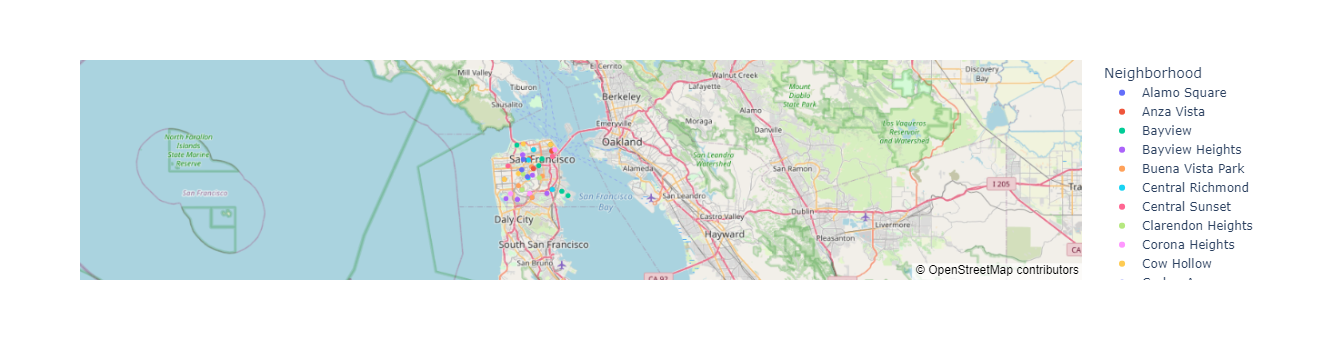

In [90]:
# Set the mapbox access token

# Create a scatter mapbox to analyze neighborhood info
map_3 = px.scatter_mapbox(neighborhood_data, lat="Lat", lon='Lon', color='Neighborhood', zoom=9)
map_3.update_layout(mapbox_style="open-street-map")

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [91]:
# Fetch the data from all expensive neighborhoods per year.
sfo_data_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_data_neighborhood = sfo_data_neighborhood.sort_values(by='sale_price_sqr_foot', ascending=True).nlargest(10, columns='sale_price_sqr_foot')

#sfo_data_neighborhood = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_data_neighborhood = sfo_data_neighborhood.reset_index()
sfo_data_neighborhood


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2015,Union Square District,2258.702832,382295.0,3739.0
1,2016,Presidio Heights,1465.968586,384242.0,4390.0
2,2016,Merced Heights,1416.666667,384242.0,4390.0
3,2013,Union Square District,1290.472107,378401.0,2971.0
4,2014,Miraloma Park,1267.766203,380348.0,3528.0
5,2016,Parnassus/Ashbury Heights,1207.997485,384242.0,4390.0
6,2016,Outer Richmond,1196.645437,384242.0,4390.0
7,2015,Marina,1132.837361,382295.0,3739.0
8,2014,South of Market,1119.838877,380348.0,3528.0
9,2015,Corona Heights,1100.791194,382295.0,3739.0


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


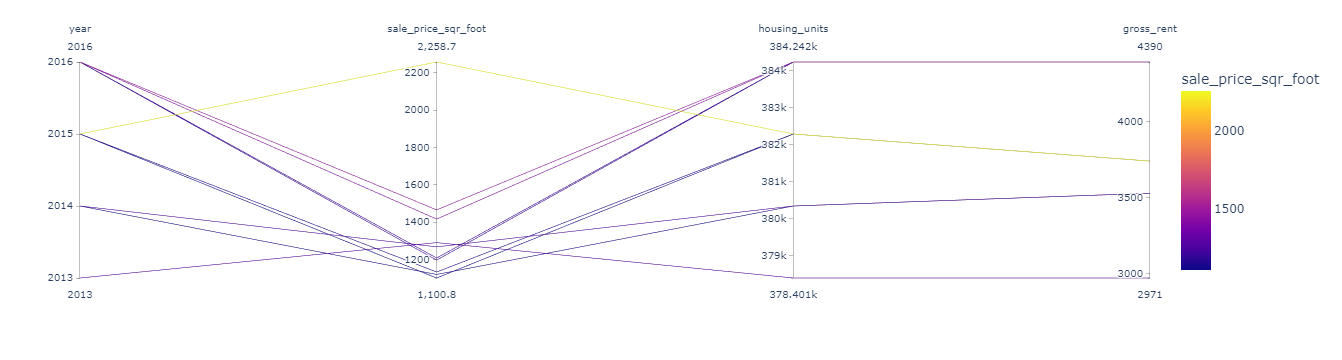

In [92]:
# Parallel Categories Plot
px.parallel_coordinates(sfo_data_neighborhood ,color='sale_price_sqr_foot')

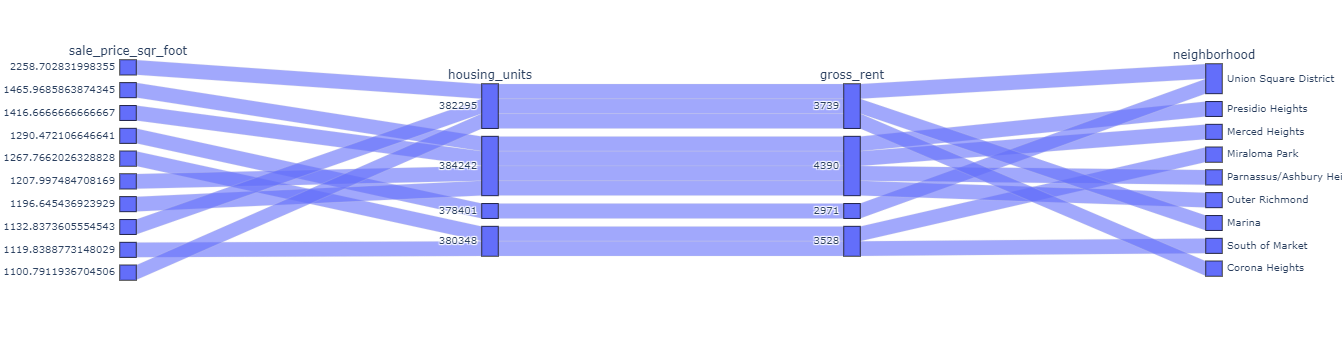

In [93]:
# Parallel Coordinates Plot
px.parallel_categories(sfo_data_neighborhood, dimensions=['sale_price_sqr_foot', 'housing_units', 'gross_rent', 'neighborhood'])

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

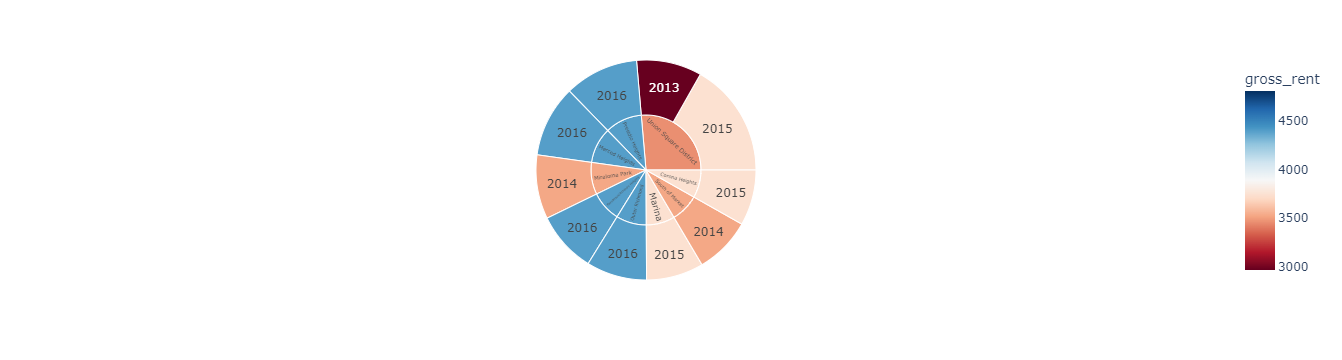

In [94]:
# Sunburst Plot
fig = px.sunburst(sfo_data_neighborhood, path=['neighborhood', 'year'], values='sale_price_sqr_foot',
                  color='gross_rent', hover_data=['neighborhood'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(sfo_data_neighborhood['gross_rent'], weights=sfo_data_neighborhood['sale_price_sqr_foot']))
fig.show()